Note: motif scanning requires `pyJaspar` to be installed.

In [ ]:
! uv pip install pyjaspar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

def display_images(image_path1, image_path2):
        # read images
        img_A = mpimg.imread(image_path1)
        img_B = mpimg.imread(image_path2)

        # pad top with white space
        larger = max(img_A.shape[0], img_B.shape[0])
        img_A = np.pad(img_A, ((larger - img_A.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)
        img_B = np.pad(img_B, ((larger - img_B.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)

        # stack
        img = np.concatenate((img_A, img_B), axis=1)
        # save tmp image
        tmp_path = 'tmp.png'
        plt.imsave(tmp_path, img)
        return Image(tmp_path, width=600)

In [2]:
chrom = 'chr12'
start = 113000000
region = 'chr12:113674023-115079631'

In [27]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_norm_10 \
    --outname motif_reverse \
    --chr $chrom \
    --start $start \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks_10kb_norm_10.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region $region \
    --ko-start 113895000 113895000 \
    --ko-width 10000 10000 \
    --ko seq ctcf \
    --ko-mode reverse_motif reverse_motif \
    --peak-height 0.5 \
    --min-val-pred 0.5 \
    --max-val-pred 2.5 \
    --plot-diff \
    --min-val-diff -0.5 \
    --max-val-diff 0.5 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_norm_10/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_norm_10/genomic_features/atac.bw \
    --silent

Maximum correlation at index 5346
Reference sequence: GCCACCAGGGAGCGC
Maximum indices: [5346]
Sequence at index 5346: GCCACCAGGGAGCGC (corr: 0.672)


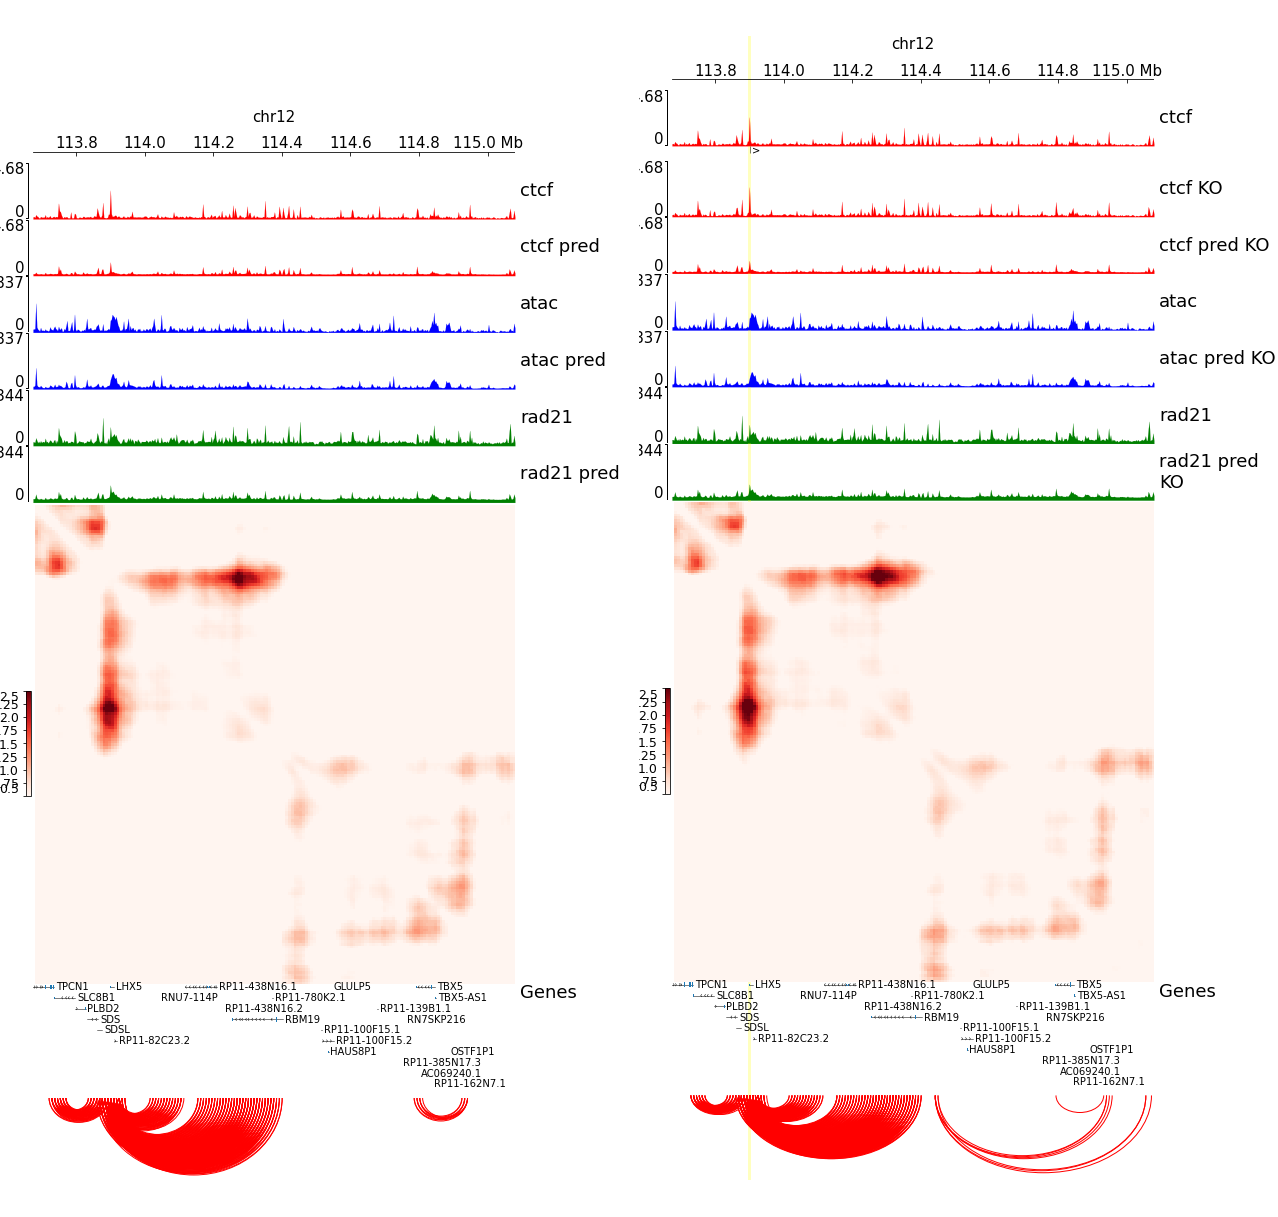

In [28]:
display_images(f'outputs/motif_reverse_hESC_WT_norm_10_{chrom}_{start}_ctcf_pred_tracks.png', 
               f'outputs/motif_reverse_hESC_WT_norm_10_{chrom}_{start}_ctcf_ko_tracks.png')

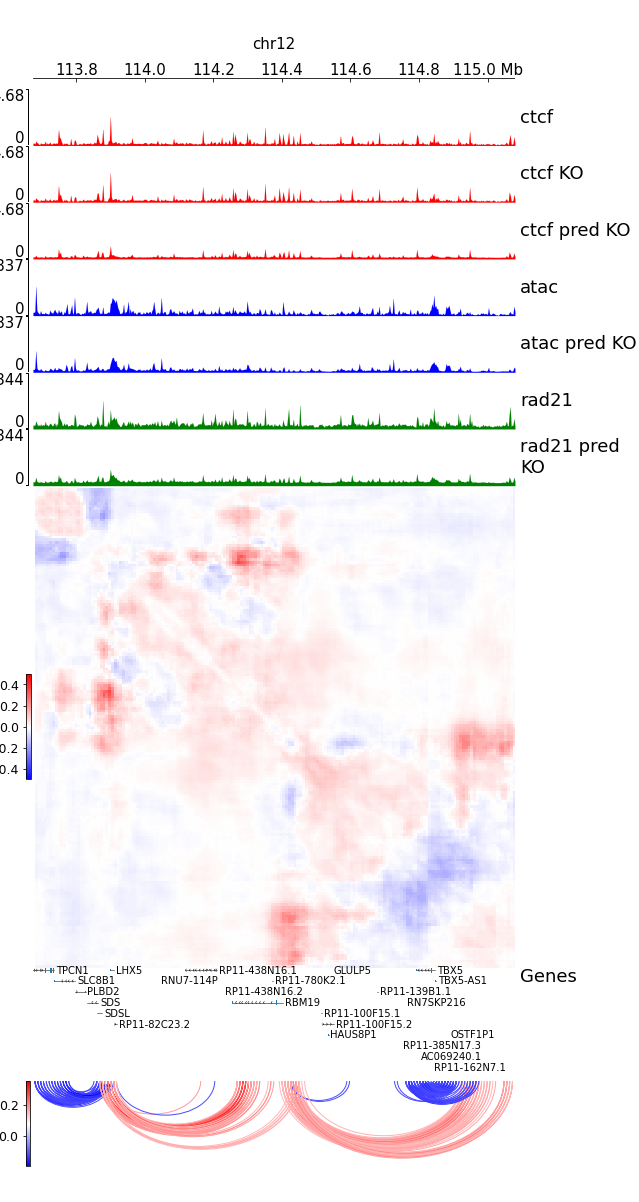

In [8]:
Image(filename='outputs/motif_reverse_hESC_WT_norm_10_chr12_113000000_ctcf_ko_tracks_diff.png', width=300)

In [25]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_norm_10 \
    --outname motif_reverse \
    --chr $chrom \
    --start $start \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks_10kb_norm_10.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region $region \
    --ko-start 113674023 \
    --ko-width 1405608 \
    --ko seq \
    --ko-mode reverse_motif \
    --peak-height 0.5 \
    --min-val-pred 0.5 \
    --max-val-pred 3.0 \
    --plot-diff \
    --min-val-diff -0.01 \
    --max-val-diff 0.01 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_norm_10/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_norm_10/genomic_features/atac.bw \
    --silent

Maximum correlation at index 495978
Reference sequence: GTGCCCCCTGGTGGA
Maximum indices: [ 686331 1272493  294300  187245  631227  550121  744476 1389155  150980
  582820  226323   80109  495978]
Sequence at index 686331: CCTCCACCTGCTGGC (corr: 0.651)
Sequence at index 1272493: GTGCCCTCTAGCGGC (corr: 0.652)
Sequence at index 294300: GCACCACCTGGTGGA (corr: 0.653)
Sequence at index 187245: GCCAACAGGTGGCTC (corr: 0.653)
Sequence at index 631227: GCCTCCAGGGGGCGT (corr: 0.656)
Sequence at index 550121: GCCACCAGAGGACAC (corr: 0.657)
Sequence at index 744476: ACCAGCAGGGGACGC (corr: 0.657)
Sequence at index 1389155: GTCACCAGGGGGCAG (corr: 0.658)
Sequence at index 150980: GCCAGCAGGGGGTGG (corr: 0.661)
Sequence at index 582820: GTGCCCACTGCTGGC (corr: 0.672)
Sequence at index 226323: GCCACCAGGGAGCGC (corr: 0.672)
Sequence at index 80109: GCCACTAGAGGGCAG (corr: 0.689)
Sequence at index 495978: GTGCCCCCTGGTGGA (corr: 0.704)


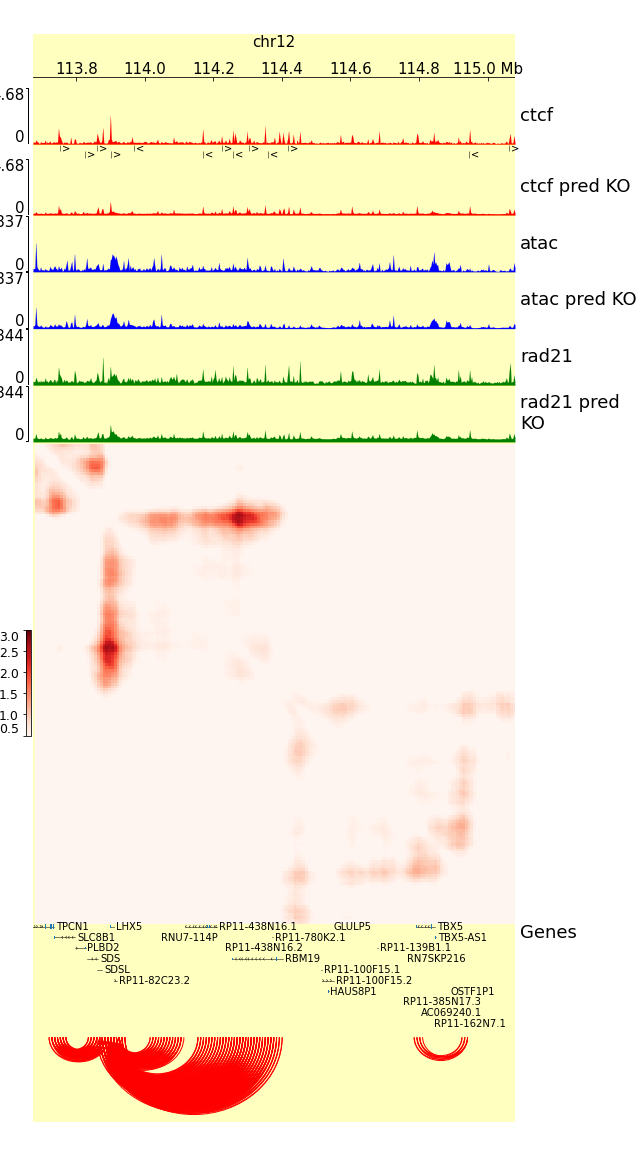

In [26]:
Image(filename=f'outputs/motif_reverse_hESC_WT_norm_10_{chrom}_{start}_ctcf_ko_tracks.png', width=300)